# Preparing Data and Importing Libraries

In [2]:
!pip install tensorflow 

In [17]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [4]:
# Only obtaining images
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [7]:
for image_class in os.listdir(data_dir):
    print(image_class)

naruto
other


(1405, 2500, 3)

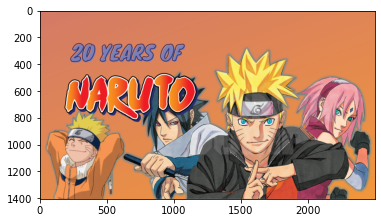

In [16]:
img = cv2.imread(os.path.join('data','naruto','naruto-feature-manga.png'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
img.shape

In [18]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 445 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [46]:
# Can Rerun for another batch [of images] from iterator
batch = data_iterator.next()

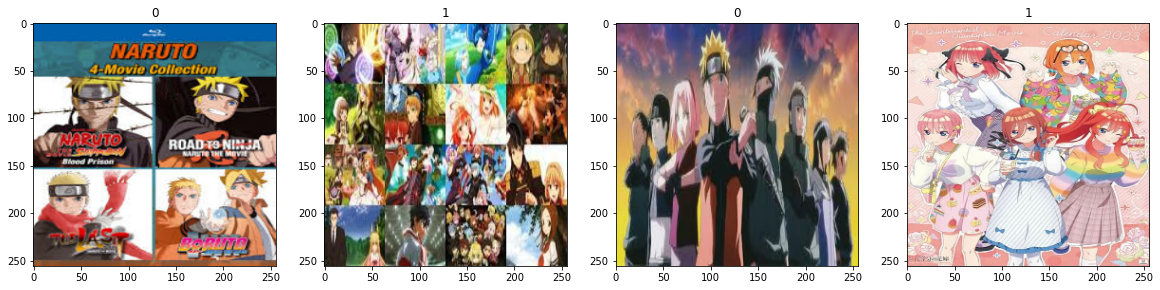

In [47]:
# 1 for Other Animes, 0 for Naruto
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [27]:
data = data.map(lambda x,y: (x/255, y))

In [28]:
data.as_numpy_iterator().next()

(array([[[[0.32299325, 0.2689185 , 0.32732844],
          [0.24646139, 0.19816177, 0.25678614],
          [0.31401655, 0.27337623, 0.33590686],
          ...,
          [0.8385723 , 0.8542586 , 0.7562194 ],
          [0.8509804 , 0.8666667 , 0.76862746],
          [0.8720282 , 0.88771445, 0.78967524]],
 
         [[0.3216032 , 0.26752844, 0.32593837],
          [0.24766564, 0.19936602, 0.2579904 ],
          [0.31215855, 0.27151823, 0.33404887],
          ...,
          [0.85202545, 0.86418843, 0.7679109 ],
          [0.85858434, 0.8707473 , 0.7744698 ],
          [0.8727714 , 0.88493437, 0.7886568 ]],
 
         [[0.31961113, 0.26553637, 0.3239463 ],
          [0.24904037, 0.20074074, 0.25936514],
          [0.3090499 , 0.26840958, 0.33094022],
          ...,
          [0.8702983 , 0.8768547 , 0.78370214],
          [0.8706155 , 0.8771718 , 0.78401923],
          [0.87661177, 0.8831681 , 0.7900155 ]],
 
         ...,
 
         [[0.69448936, 0.50463146, 0.41948393],
          [0.77636

In [29]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)



In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [35]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])



Epoch 1/20
9/9 [==============================] - 7s 617ms/step - loss: 0.9198 - accuracy: 0.5104 - val_loss: 0.7524 - val_accuracy: 0.6406
Epoch 2/20
9/9 [==============================] - 6s 599ms/step - loss: 0.6736 - accuracy: 0.6701 - val_loss: 0.6736 - val_accuracy: 0.5938
Epoch 3/20
9/9 [==============================] - 6s 578ms/step - loss: 0.6137 - accuracy: 0.6944 - val_loss: 0.6194 - val_accuracy: 0.6406
Epoch 4/20
9/9 [==============================] - 6s 637ms/step - loss: 0.5559 - accuracy: 0.7049 - val_loss: 0.6039 - val_accuracy: 0.5781
Epoch 5/20
9/9 [==============================] - 7s 683ms/step - loss: 0.5165 - accuracy: 0.7118 - val_loss: 0.4772 - val_accuracy: 0.9375
Epoch 6/20
9/9 [==============================] - 6s 636ms/step - loss: 0.4270 - accuracy: 0.8403 - val_loss: 0.3619 - val_accuracy: 0.8125
Epoch 7/20
9/9 [==============================] - 6s 619ms/step - loss: 0.3199 - accuracy: 0.8576 - val_loss: 0.4455 - val_accuracy: 0.7656
Epoch 8/20
9/9 [====

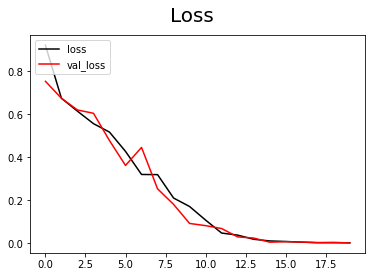

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='black', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

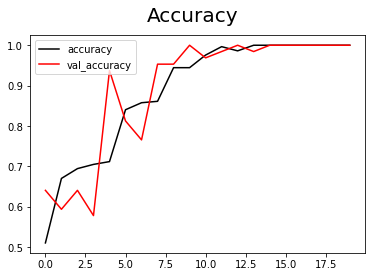

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='black', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 192ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Testing the model

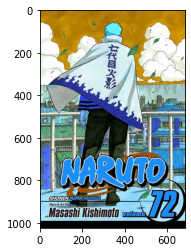

In [59]:
img = cv2.imread('narutotest.jpg')
plt.imshow(img)
plt.show()

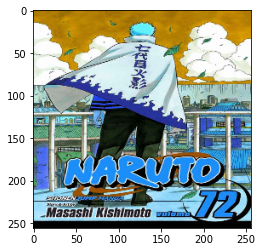

In [60]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [61]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 21ms/step


array([[0.9738875]], dtype=float32)

In [62]:
if yhat > 0.5: 
    print(f'Predicted class is not Naruto')
else:
    print(f'Predicted class is Naruto')

Predicted class is not Naruto


# To Do:  
- More data for Naruto (Maybe add some Manga shots)  
- Even it out by adding some other animes  